In [1]:
import pandas as pd
print(pd)

<module 'pandas' from 'C:\\Users\\DEEPAK OLI\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>


In [2]:
data_set = pd.read_csv("Iris.csv")

In [3]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [4]:
print(data_set.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [5]:
print(data_set.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
print(data_set['SepalLengthCm'].mean())
print(data_set['SepalLengthCm'].max())
print(data_set['SepalLengthCm'].min())
print(data_set['SepalLengthCm'].std())
print(data_set['SepalLengthCm'].var())


5.843333333333334
7.9
4.3
0.8280661279778629
0.6856935123042505


In [7]:
print(data_set['SepalLengthCm'].mean())

5.843333333333334


In [8]:
# Group by species and calculate the mean of each numerical column
print(data_set.groupby('Species')['SepalLengthCm'].head(1050).sort_values(ascending=False))


131    7.9
135    7.7
122    7.7
117    7.7
118    7.7
      ... 
41     4.5
42     4.4
38     4.4
8      4.4
13     4.3
Name: SepalLengthCm, Length: 150, dtype: float64


In [9]:
import matplotlib.pyplot  as plt

TypeError: cannot unpack non-iterable Axes object

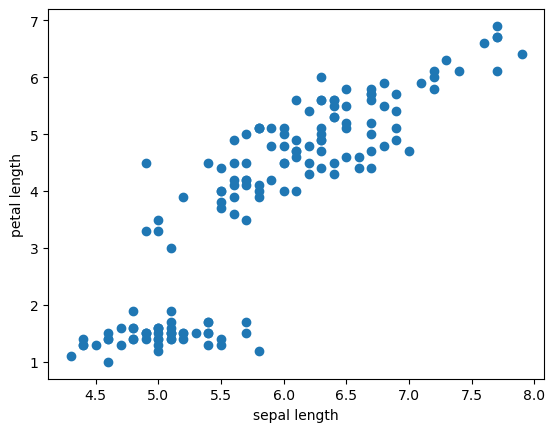

In [10]:
#SCATTER IS used to show 
plt.scatter(data_set['SepalLengthCm'], data_set['PetalLengthCm'])
plt.xlabel("sepal length")
plt.ylabel("petal length")

fig, ax = plt.subplot()
ax.scatter('SepalLengthCm' ,'PetalLengthCm',data =data_set)

In [11]:
iris_grouped = data_set.groupby('Species').mean()
print(iris_grouped )

                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


In [12]:
plane_set = pd.read_csv("airplane.csv")
print(plane_set.columns)
print(plane_set.head())
# grouped = plane_set.groupby('Operator').mean()
# grouped

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')
   index        Date   Time                            Location  \
0      0  09/17/1908  17:18                 Fort Myer, Virginia   
1      1  07/12/1912  06:30             AtlantiCity, New Jersey   
2      2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3      3  09/09/1913  18:30                  Over the North Sea   
4      4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German

In [13]:
# Select only numeric columns
numeric_columns = plane_set.select_dtypes(include=['float64', 'int64'])

# Group by 'Operator' and calculate mean for numeric columns

grouped = numeric_columns.groupby(plane_set['Operator']).mean()
grouped


,index,Aboard,Fatalities,Ground
Operator,,,,
A B Aerotransport,337.500000,8.500000,1.500000,0.0
AB Aerotransport,802.666667,21.333333,19.333333,0.0
ACES Colombia,3801.000000,13.666667,13.333333,0.0
ADC Airlines,4814.000000,80.000000,48.500000,0.0
ADES Colombia,4174.000000,11.500000,11.000000,0.0
...,...,...,...,...
Zantop Air Transport,1798.000000,3.250000,3.250000,0.0
Zantop Airways,2615.000000,2.000000,2.000000,1.0
Zantop International Airlines,3482.000000,4.000000,4.000000,0.0


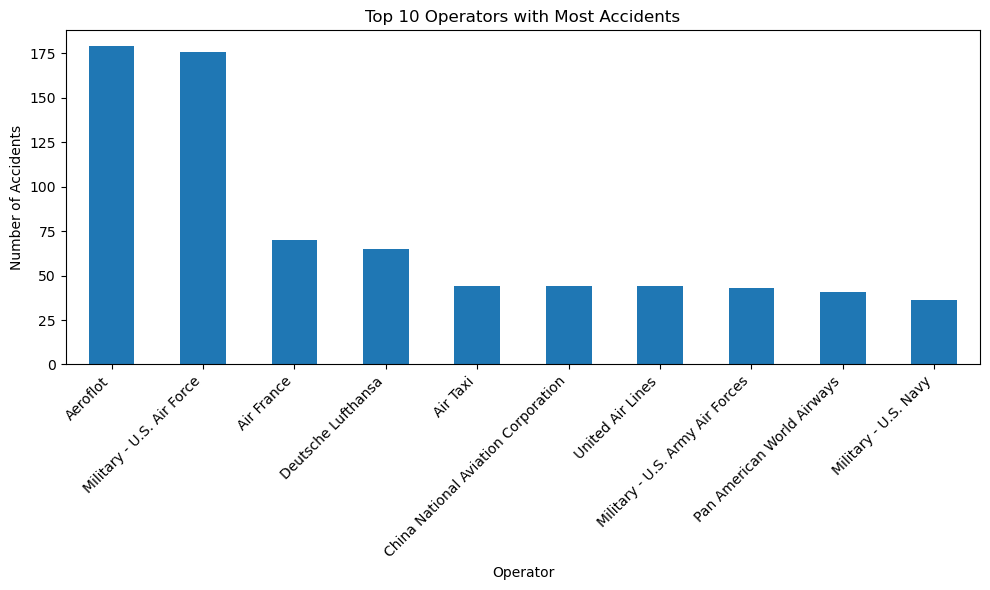

In [14]:
accidents_by_operator = plane_set['Operator'].value_counts().head(10)
plt.figure(figsize=(10, 6))
accidents_by_operator.plot(kind='bar')
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Operators with Most Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Type
Douglas DC-3                                334
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
Yakovlev YAK-40                              37
Antonov AN-26                                36
Junkers JU-52/3m                             32
Douglas C-47B                                29
De Havilland DH-4                            28
Name: count, dtype: int64


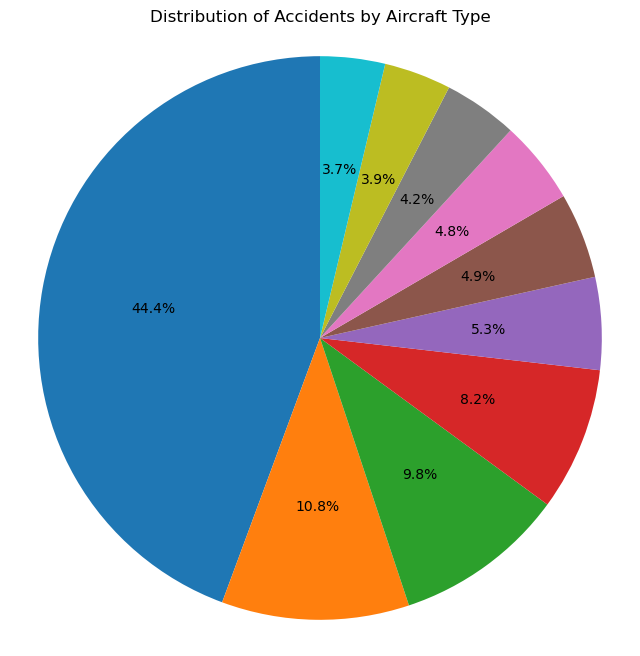

In [15]:
# Sample data
accidents_by_type = plane_set['Type'].value_counts().head(10)
print(accidents_by_type)
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart
wedges, texts, autotexts = ax.pie(accidents_by_type, autopct='%1.1f%%', startangle=90)

# Set equal aspect ratio for a circular pie chart
ax.axis('equal')

# Add a title
ax.set_title('Distribution of Accidents by Aircraft Type')

# Display the plot
plt.show()

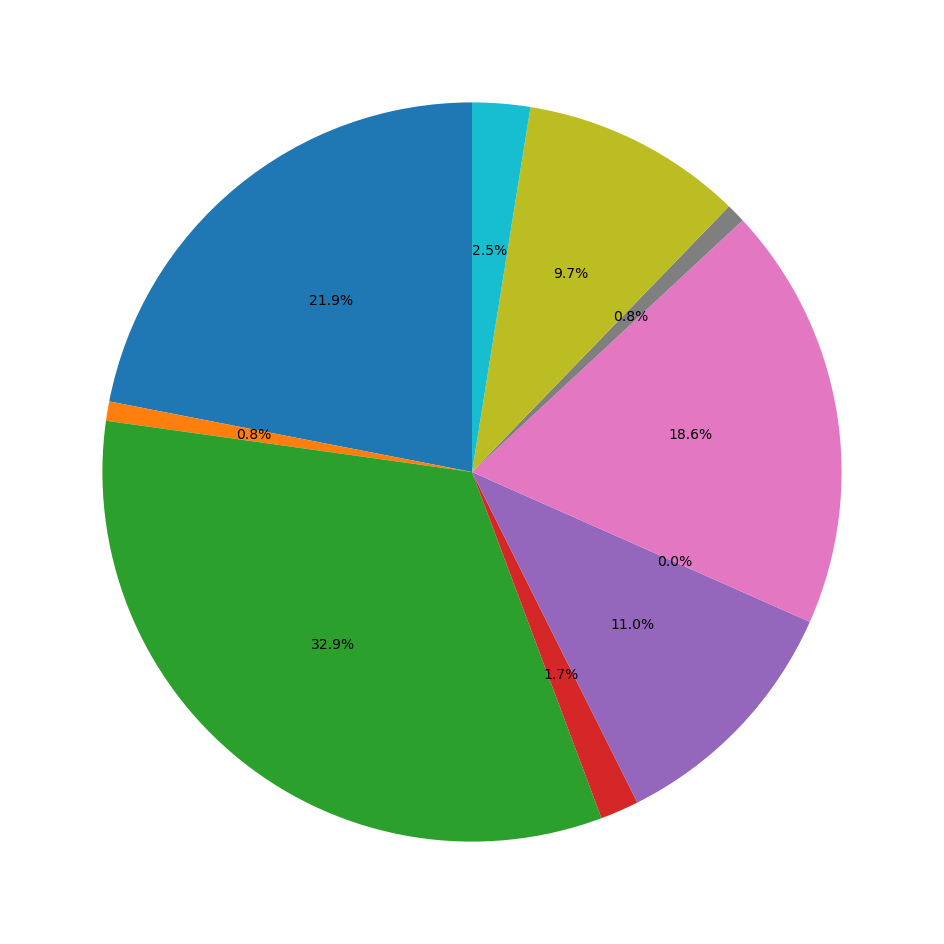

Location
1,200 miles off Dakar, AtlantiOcean             52.0
100 miles SW of Kuujjuaq, Quebec, Canada         2.0
110 miles SW of Sochi, Russia                   78.0
200 miles NE of Derby, Australia                 4.0
25 nm off Agrigento, Italy                      26.0
300 nm NW of San Francisco, California           0.0
900 miles E of Honolulu, Hawaii, PacifiOcean    44.0
950 nm S of  Shemya, Alaska                      2.0
Abakan, Siberia, Russia                         23.0
Aberdeen, South Dakota                           6.0
Name: Fatalities, dtype: float64

In [26]:
import pandas as pd

# plane_set = pd.read_csv("ariplane.csv")
data =  plane_set.groupby('Location')['Fatalities'].sum().head(10)
fig ,ax =plt.subplots(figsize=(12,12))
ax.pie(data, autopct='%1.1f%%', startangle=90)
plt.show()
data

In [17]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


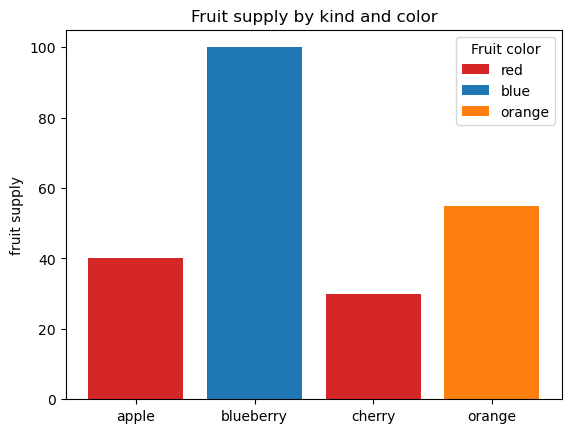

In [18]:
fig, ax= plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()


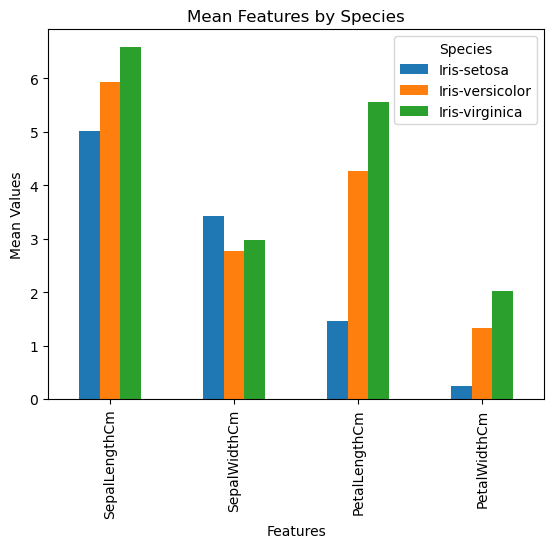

In [19]:
grouped_mean = data_set.groupby('Species').mean().T
grouped_mean.drop(['Id'], axis=0, inplace=True)

# Plotting
fig, ax = plt.subplots()

grouped_mean.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Mean Values')
ax.set_title('Mean Features by Species')

# Show the plot
plt.show()

In [20]:

grouped_data = plane_set.groupby("Location").apply(lambda x: x.select_dtypes(include=['int', 'float']).apply(pd.Series.value_counts))
grouped_data

index  Aboard  Fatalities  \
Location                                                                     
1,200 miles off Dakar, AtlantiOcean      0.0       NaN     NaN         NaN   
                                         52.0      NaN     1.0         1.0   
                                         957.0     1.0     NaN         NaN   
100 miles SW of Kuujjuaq, Quebec, Canada 0.0       NaN     NaN         NaN   
                                         2.0       NaN     1.0         1.0   
...                                                ...     ...         ...   
Zwingle, Iowa                            8.0       NaN     1.0         1.0   
                                         4176.0    1.0     NaN         NaN   
near Orillia, Ontario, Canada            0.0       NaN     NaN         NaN   
                                         2.0       NaN     1.0         1.0   
                                         3507.0    1.0     NaN         NaN   

                                                 Ground  
Location                                                 
1,200 miles off Dakar, AtlantiOcean      0.0        1.0  
                                         52.0       NaN  
                                         957.0      NaN  
100 miles SW of Kuujjuaq, Quebec, Canada 0.0        1.0  
                                         2.0        NaN  
...                                                 ...  
Zwingle, Iowa                            8.0        NaN  
                                         4176.0     NaN  
near Orillia, Ontario, Canada            0.0        1.0  
                                         2.0        NaN  
                                         3507.0     NaN  

[16359 rows x 4 columns]

Text(0.5, 1.0, 'Correlation')

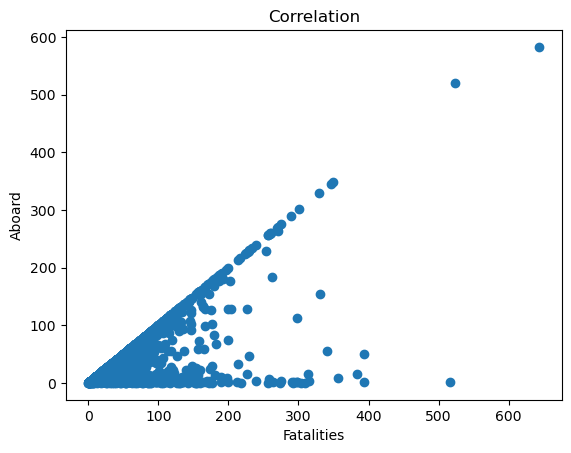

In [21]:
import numpy as np
# plane_set = plane_set.head(15000)
fig , ax = plt.subplots()
ax.scatter(plane_set['Aboard'], plane_set['Fatalities'])
categories = np.unique(plane_set['Aboard'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

ax.set_ylabel('Aboard')
ax.set_xlabel("Fatalities")
ax.set_title("Correlation")


In [22]:
plane_set

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [23]:
group = plane_set.groupby("Operator")
for x, y in group:
    print(x)
    print(y['Date'])
    print()


A B Aerotransport
278    08/30/1932
397    06/09/1936
Name: Date, dtype: object

AB Aerotransport
630    10/22/1943
884    08/09/1947
894    10/26/1947
Name: Date, dtype: object

ACES Colombia
3324    12/18/1981
3616    04/27/1986
4463    11/30/1996
Name: Date, dtype: object

ADC Airlines
4505    07/29/1997
5123    10/29/2006
Name: Date, dtype: object

ADES Colombia
4014    05/15/1991
4334    05/09/1995
Name: Date, dtype: object

AECA Cargo
3505    09/18/1984
Name: Date, dtype: object

AIDA
1454    12/08/1956
Name: Date, dtype: object

AIRES Colombia
3531    01/23/1985
4356    08/14/1995
Name: Date, dtype: object

ALADA
4453    03/12/1997
Name: Date, dtype: object

ALFA
955    07/29/1948
Name: Date, dtype: object

ALIANSA Colombia
4624    03/18/1999
Name: Date, dtype: object

ANDESA
786    07/17/1946
Name: Date, dtype: object

ANT Air Taxi
4721    06/14/2000
Name: Date, dtype: object

APRL
3504    09/16/1984
Name: Date, dtype: object

AREA
1533    04/07/1958
1694    11/07/1960
Name: Da

Air Philippines
4710    04/19/2000
Name: Date, dtype: object

Air Rainbow
4074    01/27/1992
Name: Date, dtype: object

Air Reconnaissance Unit of Liberia
3668    01/30/1987
Name: Date, dtype: object

Air Rhodesia
3072    09/03/1978
3115    02/12/1979
Name: Date, dtype: object

Air Rouergue
3111    01/27/1979
Name: Date, dtype: object

Air Saint Maurice Inc.
4811    10/08/2001
Name: Date, dtype: object

Air Satellite
4604    12/07/1998
Name: Date, dtype: object

Air Senegal
4476    02/01/1997
Name: Date, dtype: object

Air Senegal / Gambia Airways
4218    12/09/1993
Name: Date, dtype: object

Air Serv Internatiional/CemAir
5228    09/01/2008
Name: Date, dtype: object

Air Service - Air Taxi
3119    02/26/1979
Name: Date, dtype: object

Air Services
5143    04/25/2007
Name: Date, dtype: object

Air Sinai
2628    01/29/1973
Name: Date, dtype: object

Air South
2322    07/06/1969
Name: Date, dtype: object

Air St. Martin
4384    12/08/1995
Name: Date, dtype: object

Air Sunshine
4938    0

Alada
4575    08/11/1998
Name: Date, dtype: object

Alamo Airways
2038    07/11/1966
Name: Date, dtype: object

Alantis Aviation
5243    12/15/2008
Name: Date, dtype: object

Alas Chiricanas
4270    07/19/1994
Name: Date, dtype: object

Alas Nacionales, leased from Birgen Air
4397    02/06/1996
Name: Date, dtype: object

Alas del Sur
4565    07/16/1998
Name: Date, dtype: object

Alaska Aeronautical Industries
2996    09/06/1977
Name: Date, dtype: object

Alaska Airlines
906     11/30/1947
991     01/20/1949
1332    08/08/1954
1441    10/02/1956
1467    03/02/1957
1725    07/21/1961
2493    09/04/1971
2888    04/05/1976
4697    01/31/2000
Name: Date, dtype: object

Alaska Coastal Airlines
2068    08/21/1966
Name: Date, dtype: object

Alaska Helicopter - Air Taxi
2744    06/30/1974
Name: Date, dtype: object

Alaska International Air
2772    10/27/1974
Name: Date, dtype: object

Alaska Travel
3056    09/13/1978
Name: Date, dtype: object

Alaska-Washington Airways
224    10/28/1930
Name: D

Central  Airlines
210    01/27/1930
Name: Date, dtype: object

Central African Airways
1253    03/29/1953
1365    02/23/1955
1548    08/09/1958
Name: Date, dtype: object

Central Air Services
3256    11/28/1980
Name: Date, dtype: object

Central Air Transport
785    07/13/1946
974    12/05/1948
Name: Date, dtype: object

Central Airlines
3407    03/30/1983
Name: Date, dtype: object

Central Mountain Air Services
3380    09/18/1982
3437    09/02/1983
4007    04/04/1991
4160    01/14/1993
Name: Date, dtype: object

Centurian Air Cargo
5217    07/07/2008
Name: Date, dtype: object

Century Air Lines
268    03/08/1932
Name: Date, dtype: object

Century PacifiLines
263    01/29/1932
Name: Date, dtype: object

Ceskoslovenske Aerolinie
218     08/22/1930
765     03/05/1946
978     12/21/1948
1047    02/27/1950
1304    01/14/1954
1410    01/18/1956
1451    11/24/1956
1704    01/02/1961
1715    03/28/1961
1723    07/12/1961
1800    09/10/1962
2158    09/05/1967
2260    10/11/1968
2403    06/01/1

Ford Air Freight Inc.
143    05/12/1928
Name: Date, dtype: object

Formosa Airlines
3850    06/27/1989
4166    02/28/1993
4412    04/05/1996
4509    08/10/1997
4551    03/18/1998
Name: Date, dtype: object

Fortaire Aviation - Air Taxi
2204    03/23/1968
Name: Date, dtype: object

Foster Aviation
2818    05/12/1975
Name: Date, dtype: object

Fragtflug
2738    05/06/1974
Name: Date, dtype: object

Francisco Cruz
3080    09/26/1978
Name: Date, dtype: object

Franco-Roumaine
56    09/06/1921
Name: Date, dtype: object

Fred Olsen Flyveselskap
1201    05/05/1952
Name: Date, dtype: object

Freedom International
3278    04/07/1981
Name: Date, dtype: object

Frigorifico Cooperativo Los Andes
1152    09/29/1951
Name: Date, dtype: object

Frigorifico Maniqui
2869    01/18/1976
Name: Date, dtype: object

Frigorifico Reyes
3476    03/24/1984
Name: Date, dtype: object

Frigorifico Santa Rita
4081    03/02/1992
Name: Date, dtype: object

Frontier Air
3940    04/30/1990
Name: Date, dtype: object

Fron

Key West Sea Plane Service - Air Taxi
4409    03/17/1996
Name: Date, dtype: object

Keystone Air Services Ltd. - Air Taxi
4866    06/11/2002
Name: Date, dtype: object

Khalatyrka
4944    08/20/2003
Name: Date, dtype: object

Khors Aircompany
4607    12/14/1998
Name: Date, dtype: object

Kiev Production Association
4138    10/09/1992
Name: Date, dtype: object

Kime Flying Service - Air Taxi
2519    01/18/1972
Name: Date, dtype: object

Kimura International
4225    01/05/1994
Name: Date, dtype: object

Kinair Cargo
3785    08/23/1988
Name: Date, dtype: object

King Air Charter
5096    04/28/2006
Name: Date, dtype: object

Kirghizia Aba Zaoldoru
4372    10/04/1995
Name: Date, dtype: object

Kisangani Airlift
5050    05/05/2005
Name: Date, dtype: object

Kish Airlines
4972    02/10/2004
Name: Date, dtype: object

Kismayo Airlines
4456    11/13/1996
Name: Date, dtype: object

Kivu Air Services
4683    04/19/2000
Name: Date, dtype: object

Kiwi West Aviation
4326    03/29/1995
Name: Date, dt

Military - El Salvador Air Force
3617    05/01/1986
Name: Date, dtype: object

Military - Ethiopian Air Force
3330    01/14/1982
3465    02/16/1984
3665    01/13/1987
Name: Date, dtype: object

Military - Federal Nigerian Air Force
4134    09/26/1992
Name: Date, dtype: object

Military - Finish Air Force
3081    10/03/1978
Name: Date, dtype: object

Military - Florida Army National Guard
4774    03/03/2001
Name: Date, dtype: object

Military - Force Aérienne Zaïroise
3245    09/14/1980
Name: Date, dtype: object

Military - Forces Militaires Françaises
2412    07/30/1970
Name: Date, dtype: object

Military - Força Aérea Brasileira
4064    11/29/1991
Name: Date, dtype: object

Military - Força Aérea Portuguesa
1746    11/23/1961
Name: Date, dtype: object

Military - French Air Force
1766    03/20/1962
2009    11/02/1965
2156    08/31/1967
2202    03/09/1968
2487    07/30/1971
3013    11/26/1977
3333    02/03/1982
3611    03/27/1986
5146    05/06/2007
Name: Date, dtype: object

Military -

3610    03/25/1986
Name: Date, dtype: object

Misrair
349     03/15/1935
795     08/24/1946
1167    12/23/1951
1342    09/15/1954
1526    03/07/1958
1884    12/15/1963
2101    02/07/1967
Name: Date, dtype: object

Missionary Aviation Fellowship
3692    05/25/1987
4306    12/17/1994
5038    02/22/2005
Name: Date, dtype: object

Mohawk Airlines
1858    07/02/1963
2146    06/23/1967
2355    11/19/1969
2533    03/03/1972
Name: Date, dtype: object

Moldovan Aeriantur-M Air Cargo
5130    01/09/2007
Name: Date, dtype: object

Monarch Aviation
2990    08/20/1977
Name: Date, dtype: object

Mongolian Defense Ministry
5151    06/13/2007
Name: Date, dtype: object

Monmouth Airways
2506    10/24/1971
Name: Date, dtype: object

Monument Valle - Air Taxi
2464    04/20/1971
Name: Date, dtype: object

Moore's Air Charter
3434    08/28/1983
Name: Date, dtype: object

Morningstar Air Express
5070    10/06/2005
Name: Date, dtype: object

Morris Hancock Flying Club - Charter
4921    03/28/2003
Name: Date, 

Prestige Airlines (Cargo) Charter
4870    07/04/2002
Name: Date, dtype: object

Price Aircraft Company
4714    05/10/2000
Name: Date, dtype: object

Prinair
2296    03/05/1969
2568    06/24/1972
3150    07/24/1979
Name: Date, dtype: object

Prior Aviatoin - Air Taxi
2332    08/05/1969
Name: Date, dtype: object

Priority Air - Air Taxi
2172    11/25/1967
Name: Date, dtype: object

Priorty Air Charter
4848    03/15/2002
Name: Date, dtype: object

Private
2       08/06/1913
367     08/15/1935
1527    03/22/1958
1839    03/05/1963
1928    07/31/1964
2176    12/10/1967
2430    10/04/1970
2472    05/28/1971
2590    09/24/1972
2598    10/16/1972
2671    08/15/1973
2858    11/29/1975
2962    03/04/1977
3152    08/02/1979
3343    03/19/1982
3598    12/31/1985
3867    08/13/1989
4008    04/04/1991
4172    04/01/1993
4176    04/19/1993
4193    07/12/1993
4413    04/11/1996
4510    08/10/1997
4523    10/12/1997
4600    11/21/1998
4643    07/16/1999
4648    07/31/1999
4753    10/16/2000
4855    04/

Sociedad Aeronautica Medellin
1131    06/15/1951
1631    12/08/1959
Name: Date, dtype: object

Sociedade de Aviacao Ligeira Charter
4776    03/17/2001
Name: Date, dtype: object

Societa Aerea Mediterranea
1762    03/08/1962
Name: Date, dtype: object

Societe Aerienne du Littoral
891    10/16/1947
Name: Date, dtype: object

Societe Alpes Provence
1150    09/12/1951
Name: Date, dtype: object

Societe France Hydro
1392    09/10/1955
Name: Date, dtype: object

Societe Indochinoise de Raviteillement
1321    04/13/1954
Name: Date, dtype: object

Societe Indochinoise de Transport Aeriens
1049    03/10/1950
Name: Date, dtype: object

Societe Transatlantique Aerienne
1043    01/24/1950
Name: Date, dtype: object

Società Aerea Teseo
924    02/20/1948
Name: Date, dtype: object

Société Auxiliare de Navigation Aérienne
898    11/13/1947
Name: Date, dtype: object

Société Aérienne de Tr. Tropicaux
1189    03/24/1952
Name: Date, dtype: object

Société de Transports Aériens
929    03/02/1948
Name: Da

Transportno Aviatsionno Bulgaro-Soviet Obshchestvo
2086    11/24/1966
Name: Date, dtype: object

Transports Aériens de la Guinee-Bissau
4034    08/15/1991
Name: Date, dtype: object

Transporturile Aeriene Romane (TAROM)
4327    03/31/1995
Name: Date, dtype: object

Transporturile Aeriene Romano-Sovietice
885    08/13/1947
Name: Date, dtype: object

Transworld Safaris
5000    08/18/2004
Name: Date, dtype: object

Travel Air Flug
3693    05/30/1987
Name: Date, dtype: object

TriCoastal Air
5086    02/08/2006
Name: Date, dtype: object

Trigana Air Service
4296    11/04/1994
4862    05/25/2002
5078    11/17/2006
Name: Date, dtype: object

Trillium Air
3664    01/12/1987
Name: Date, dtype: object

TropiAir - Air Taxi
4006    04/01/1991
Name: Date, dtype: object

Tropical Airways
4945    08/24/2003
Name: Date, dtype: object

TsAGI
458    02/05/1938
Name: Date, dtype: object

Tulakes Aviaiton - Air Taxi
2178    12/15/1967
Name: Date, dtype: object

Tuninter
5058    08/06/2005
Name: Date, dtyp